<a href="https://colab.research.google.com/github/franklaercio/titanic_machine_learning/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Hi, in this code we will predict survived for the tragic accident Titanic.
It's a Kaggle competition and you check on this link ***https://www.kaggle.com/c/titanic***.

A brief summary the tragic disaster below:
> *On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew* - available on Kaggle.

### *Now let's go code*
In this moment I'll import libraries and machine learning algorithms. For example numpy, pandas, sklearn, decision tree regressor etc.

In [139]:
# linear algebra
import numpy as np 

# library
import pandas as pd
import re

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Algorithms
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Path of the file to read
titanic_file_path = 'https://raw.githubusercontent.com/franklaercio/titanic_machine_learning/master/train.csv'
titanic_data = pd.read_csv(titanic_file_path)
titanic_url_test = "https://raw.githubusercontent.com/franklaercio/titanic_machine_learning/master/test.csv"
titanic_data_test = pd.read_csv(titanic_url_test)

# **Exploration Data Analysis**

In this section we needing understand our data:
1. General view
2. Create *hypotheses*
3. Visualization datas

## *General view of dataset*

In [103]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [105]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Can we check a lot of implications.
*   Existing null datas
*   Ours datas are PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin and Embarked 

### For this moment will need visualization data and create hipotheses

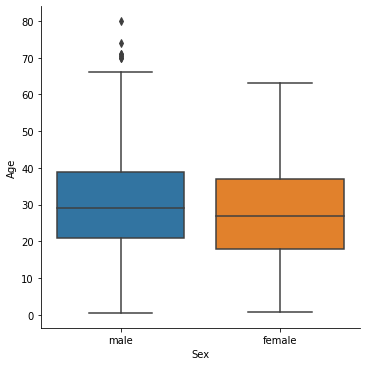

In [106]:
sns.catplot(x="Sex", y="Age", kind="box", data=titanic_data)

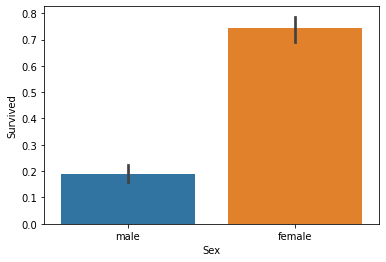

In [107]:
sns.barplot(x='Sex', y='Survived', data=titanic_data,)

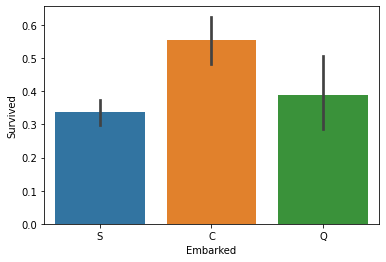

In [108]:
sns.barplot(x='Embarked', y='Survived', data=titanic_data,)

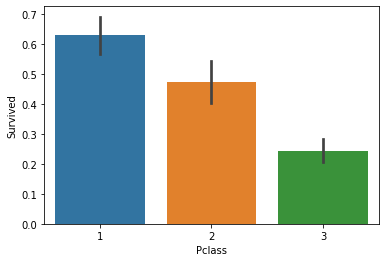

In [109]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data,)

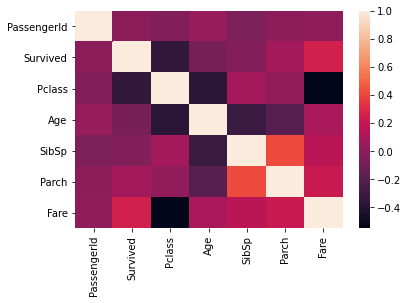

In [110]:
sns.heatmap(titanic_data.corr())

Okay, now will get out the good ideais.

*   Women had more posibily survived
*   Rich peaple had more posibily survived


# **Removing trash in dataset and replacing some columns**
*With the hyphoteses explain above, we can remove the data by name, passengerId and ticket (because it's a random number)*



In [140]:
# Removing colmuns not using in model
titanic_data = titanic_data.drop (['PassengerId'], axis = 1)
titanic_data = titanic_data.drop(['Ticket'], axis=1)
titanic_data_test = titanic_data_test.drop(['Ticket'], axis=1)
titanic_data = titanic_data.drop(['Name'], axis=1)
titanic_data_test = titanic_data_test.drop(['Name'], axis=1) 
titanic_data = titanic_data.drop(['Age'], axis=1)
titanic_data_test = titanic_data_test.drop(['Age'], axis=1)
titanic_data = titanic_data.drop(['Fare'], axis=1)
titanic_data_test = titanic_data_test.drop(['Fare'], axis=1)  

data = [titanic_data, titanic_data_test]

common_value = 'S'

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [141]:
titanic_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,0,3,male,1,0,NaN,S
1,1,1,female,1,0,C85,C
2,1,3,female,0,0,NaN,S
3,1,1,female,1,0,C123,S
4,0,3,male,0,0,NaN,S


# **Manipulation dataset and refactoring features**


In [144]:
# Replacing categoric data

data = [titanic_data, titanic_data_test]

genders = {"male": 0, "female": 1}
classes = {"S": 0, "C": 1, "Q": 2}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(classes) 

data = [titanic_data, titanic_data_test]

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
titanic_data = titanic_data.drop(['Cabin'], axis=1)
titanic_data_test = titanic_data_test.drop(['Cabin'], axis=1)    

In [145]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Deck        0
dtype: int64

In [146]:
titanic_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Deck
0,0,3,0,1,0,0,8
1,1,1,1,1,0,1,3
2,1,3,1,0,0,0,8
3,1,1,1,1,0,0,3
4,0,3,0,0,0,0,8


# **Machine Learning Algorithms**
*For this predict we will use the Algorithms Random Forest Regressor*

In [147]:
# Predict target
Y_train = titanic_data.Survived
X_train = titanic_data.drop("Survived", axis=1)
X_test  = titanic_data_test.drop("PassengerId", axis=1).copy()

In [150]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print("Accuracy Random Forest: ", acc_random_forest)

Accuracy Random Forest:  85.75


In [151]:
print(Y_prediction)

output = pd.DataFrame({'PassengerId': titanic_data_test.PassengerId, 'Survived': titanic_preds})
output.to_csv('submission.csv', index=False)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]
